# Chefing
## Parsa Idehpour, Joy Wang, Eric Zou
Chefing is your AI-powered kitchen companion — the bridge between technology and creativity in cooking. Open your fridge, see a few random ingredients, and instantly get personalized, high-quality recipes tailored to your tastes, dietary needs, time, and even mood. Chefing learns whether you prefer quick bites or gourmet experiments, adjusts for allergies or preferences, and evolves with your cooking style.

Through a voice-assisted interface and smart integrations, Chefing guides you step by step, sets timers, and suggests substitutions when ingredients are missing. It also promotes sustainability by reducing food waste and creating dynamic grocery lists for intentional shopping.

Cooking becomes less of a chore and more of a creative partnership — helping you cook smarter, eat better, and live more sustainably. Chefing is the future of home cooking, designed for your life, your fridge, and your taste.


## Scenario 1 (Eric)
Providing adaptive cooking guidance that adjusts recipe complexity and instructions to the user’s skill level, helping beginners stay motivated and learn progressively.

### Narrative
A user interacts with CookEaseGPT, an AI cooking assistant that personalizes recipes and cooking instructions based on the user’s self-declared or inferred skill level.
When a beginner asks for a meal idea, the assistant retrieves a recipe, then simplifies ingredients, steps, and timing. It might remove advanced techniques (like deglazing or sous vide) and offer extra guidance (timing cues, photos, or alternative ingredients).
As the user cooks more, CookEaseGPT tracks their progress (e.g., how often they complete dishes, which techniques they’ve learned) and gradually introduces slightly more complex recipes.

### Step-by-Step Breakdown
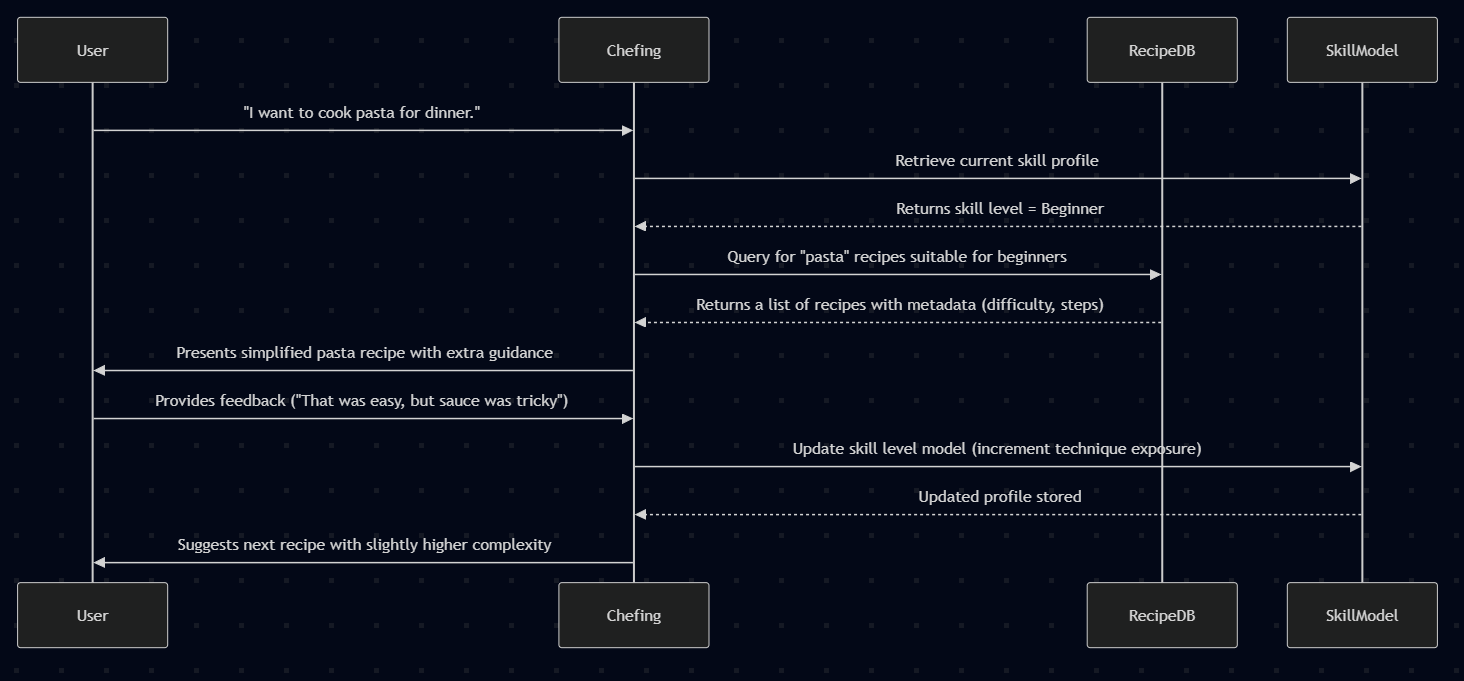

### Data Description
#### Needed Data
- User skill profile: initial skill level (e.g., “beginner”, “intermediate”), cooking experience, preferences, dietary restrictions.
Collected through chat prompts or profile setup.
- Recipe metadata: from an external recipe database or API, including difficulty, prep time, required techniques, equipment, ingredients, and step structure.
- Feedback data: user ratings, completion success, and comments about challenges.

#### Created Data
- Skill progression model: structured data (e.g., JSON) tracking user’s proficiency in various techniques and complexity tolerance.
- Interaction logs: user prompts and responses to track learning and personalization.
- Recipe adaptation metadata: the transformations applied (simplified instructions, reduced steps, substitutions)

### Evaluation
1. Complexity of suggested recipes gradually increases and aligns with user progress based on a scoring criteria (could be LLM panel)
2. Recipe quality remains consistent throughout all responses (recipes aren't impossible in most cases)
#### Possible complications:
- Users may overestimate or underestimate their skill, leading to frustration or boredom.
- Ingredient availability may conflict with simplified recipes.
- Unexpected user input (“I don’t have a stove”, “I’m allergic to everything”) may require fallback responses.
- The adaptation model might oversimplify too much, reducing culinary satisfaction.

## Scenario 2 (Eric)
A recommendation system that runs RAG-based document retrieval and MCP-based structured data retrieval in parallel to generate more accurate, contextualized, and trustworthy recommendations.

### Narrative
The user interacts with Chefing, which now leverages two parallel context streams:

MCP Context Stream – Provides structured, verified data from APIs or databases (e.g., user preferences, critic reviews, purchase info).

RAG Context Stream – Retrieves semantically related unstructured data (e.g., long-form articles, blogs, community posts, interviews) from a vector database or web index.

When the user asks, “Recommend pasta recipes like bolognese,” SmartRecoGPT concurrently requests:
- structured data via MCP servers (e.g., Food Network metadata, expert ratings), and
- relevant documents via the RAG retriever (e.g., reviews comparing bolognese and similar dishes).

The model then merges both streams — fusing structured reliability with richness — before generating its answer.

### Step-by-Step Breakdown
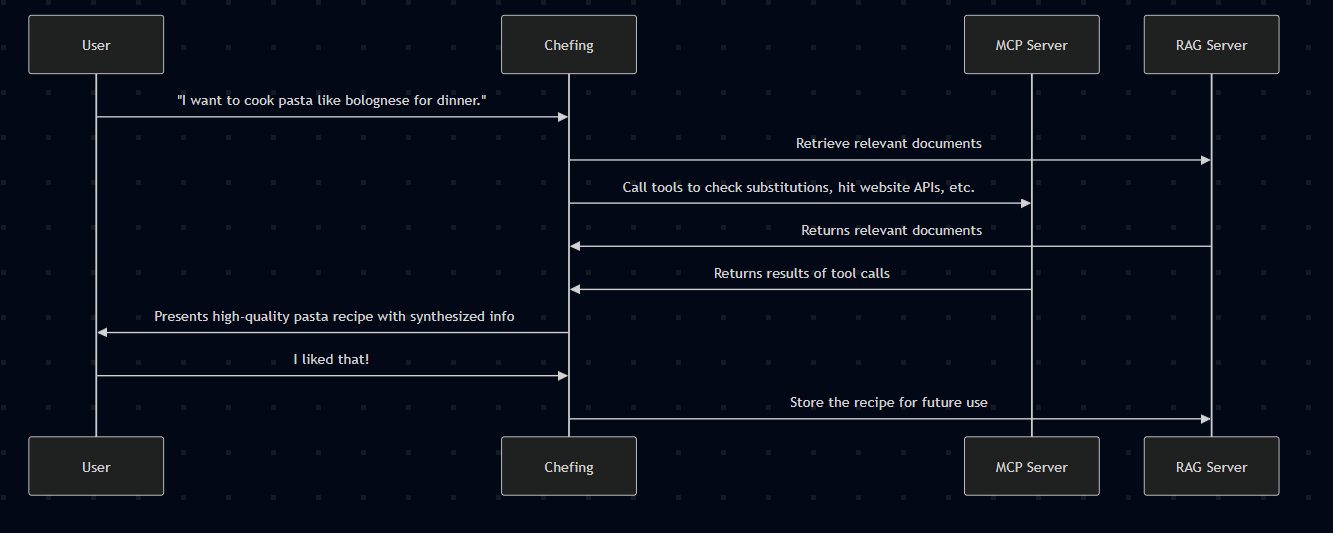

### Data Description

#### Needed Data

##### For MCP Servers
- Structured metadata
- Summaries and provenance links
- User profile data
##### For RAG Retrivers
- Unstructured content (articles, user reviews, blogs)
- Embedding vectors and similarity scores
- User profile data
- Context relevance metadata (timestamp, rank, confidence)

#### Created Data

##### Merged Context Object
- A structured + unstructured context bundle combining MCP and RAG data (with weights and provenance tags). Example schema:
```json
{
  "mcp_context": {...},
  "rag_context": {...},
  "fusion_strategy": "weighted_rank_merge",
  "sources": ["Goodreads", "CriticReviewDB", "VectorDB"],
  "timestamp": "2025-11-09T17:30Z"
}
```
##### Updated Preference Model
- After user feedback, store results in RAG for future retrieval

##### Evaluation Metadata
- Retrieval latencies
- Context quality scores
- Accuracy feedback

### Evaluation
#### Success Criteria
- Combined MCP+RAG responses produce richer, more grounded recommendations.
- Response latency remains acceptable (<30s – 1 min per query).
- Each recommendation can cite verified sources (MCP) and contextual justifications (RAG).
- Fusion weights adapt based on confidence (e.g., more MCP weighting when structured data is abundant).
#### Potential Complications
- Synchronization: RAG and MCP responses might arrive at different times; requires async context aggregation.
- Conflict Resolution: RAG might pull outdated info conflicting with MCP’s live API data.
- Overfitting: The fusion algorithm might over-prioritize verbose RAG data.
- Scaling: Running both in parallel increases system resource usage.

## Scenario 3 (Joy)
### Creating a manageable recipe using only the ingredients the user has in their fridge 
The user will initiate a chat stating they want to cook something but only have a specific set of ingredients. The LLM (acting as a "kitchen assistant") will ask the user to list everything they have available, including items in their fridge and pantry. A critical step is that the LLM will then prompt for common staples that users often forget to list (e.g., "Do you also have basics like salt, pepper, cooking oil, flour, or sugar?"). Once the user confirms the complete list, the LLM will analyze the ingredients and search its knowledge base for a recipe that uses only those items (or a subset). It will then present a recipe with a title, a final ingredient list, and manageable, step-by-step instructions. The user can then ask follow-up questions for clarification (e.g., "How high should the heat be?").

**Step-by-step break down:**
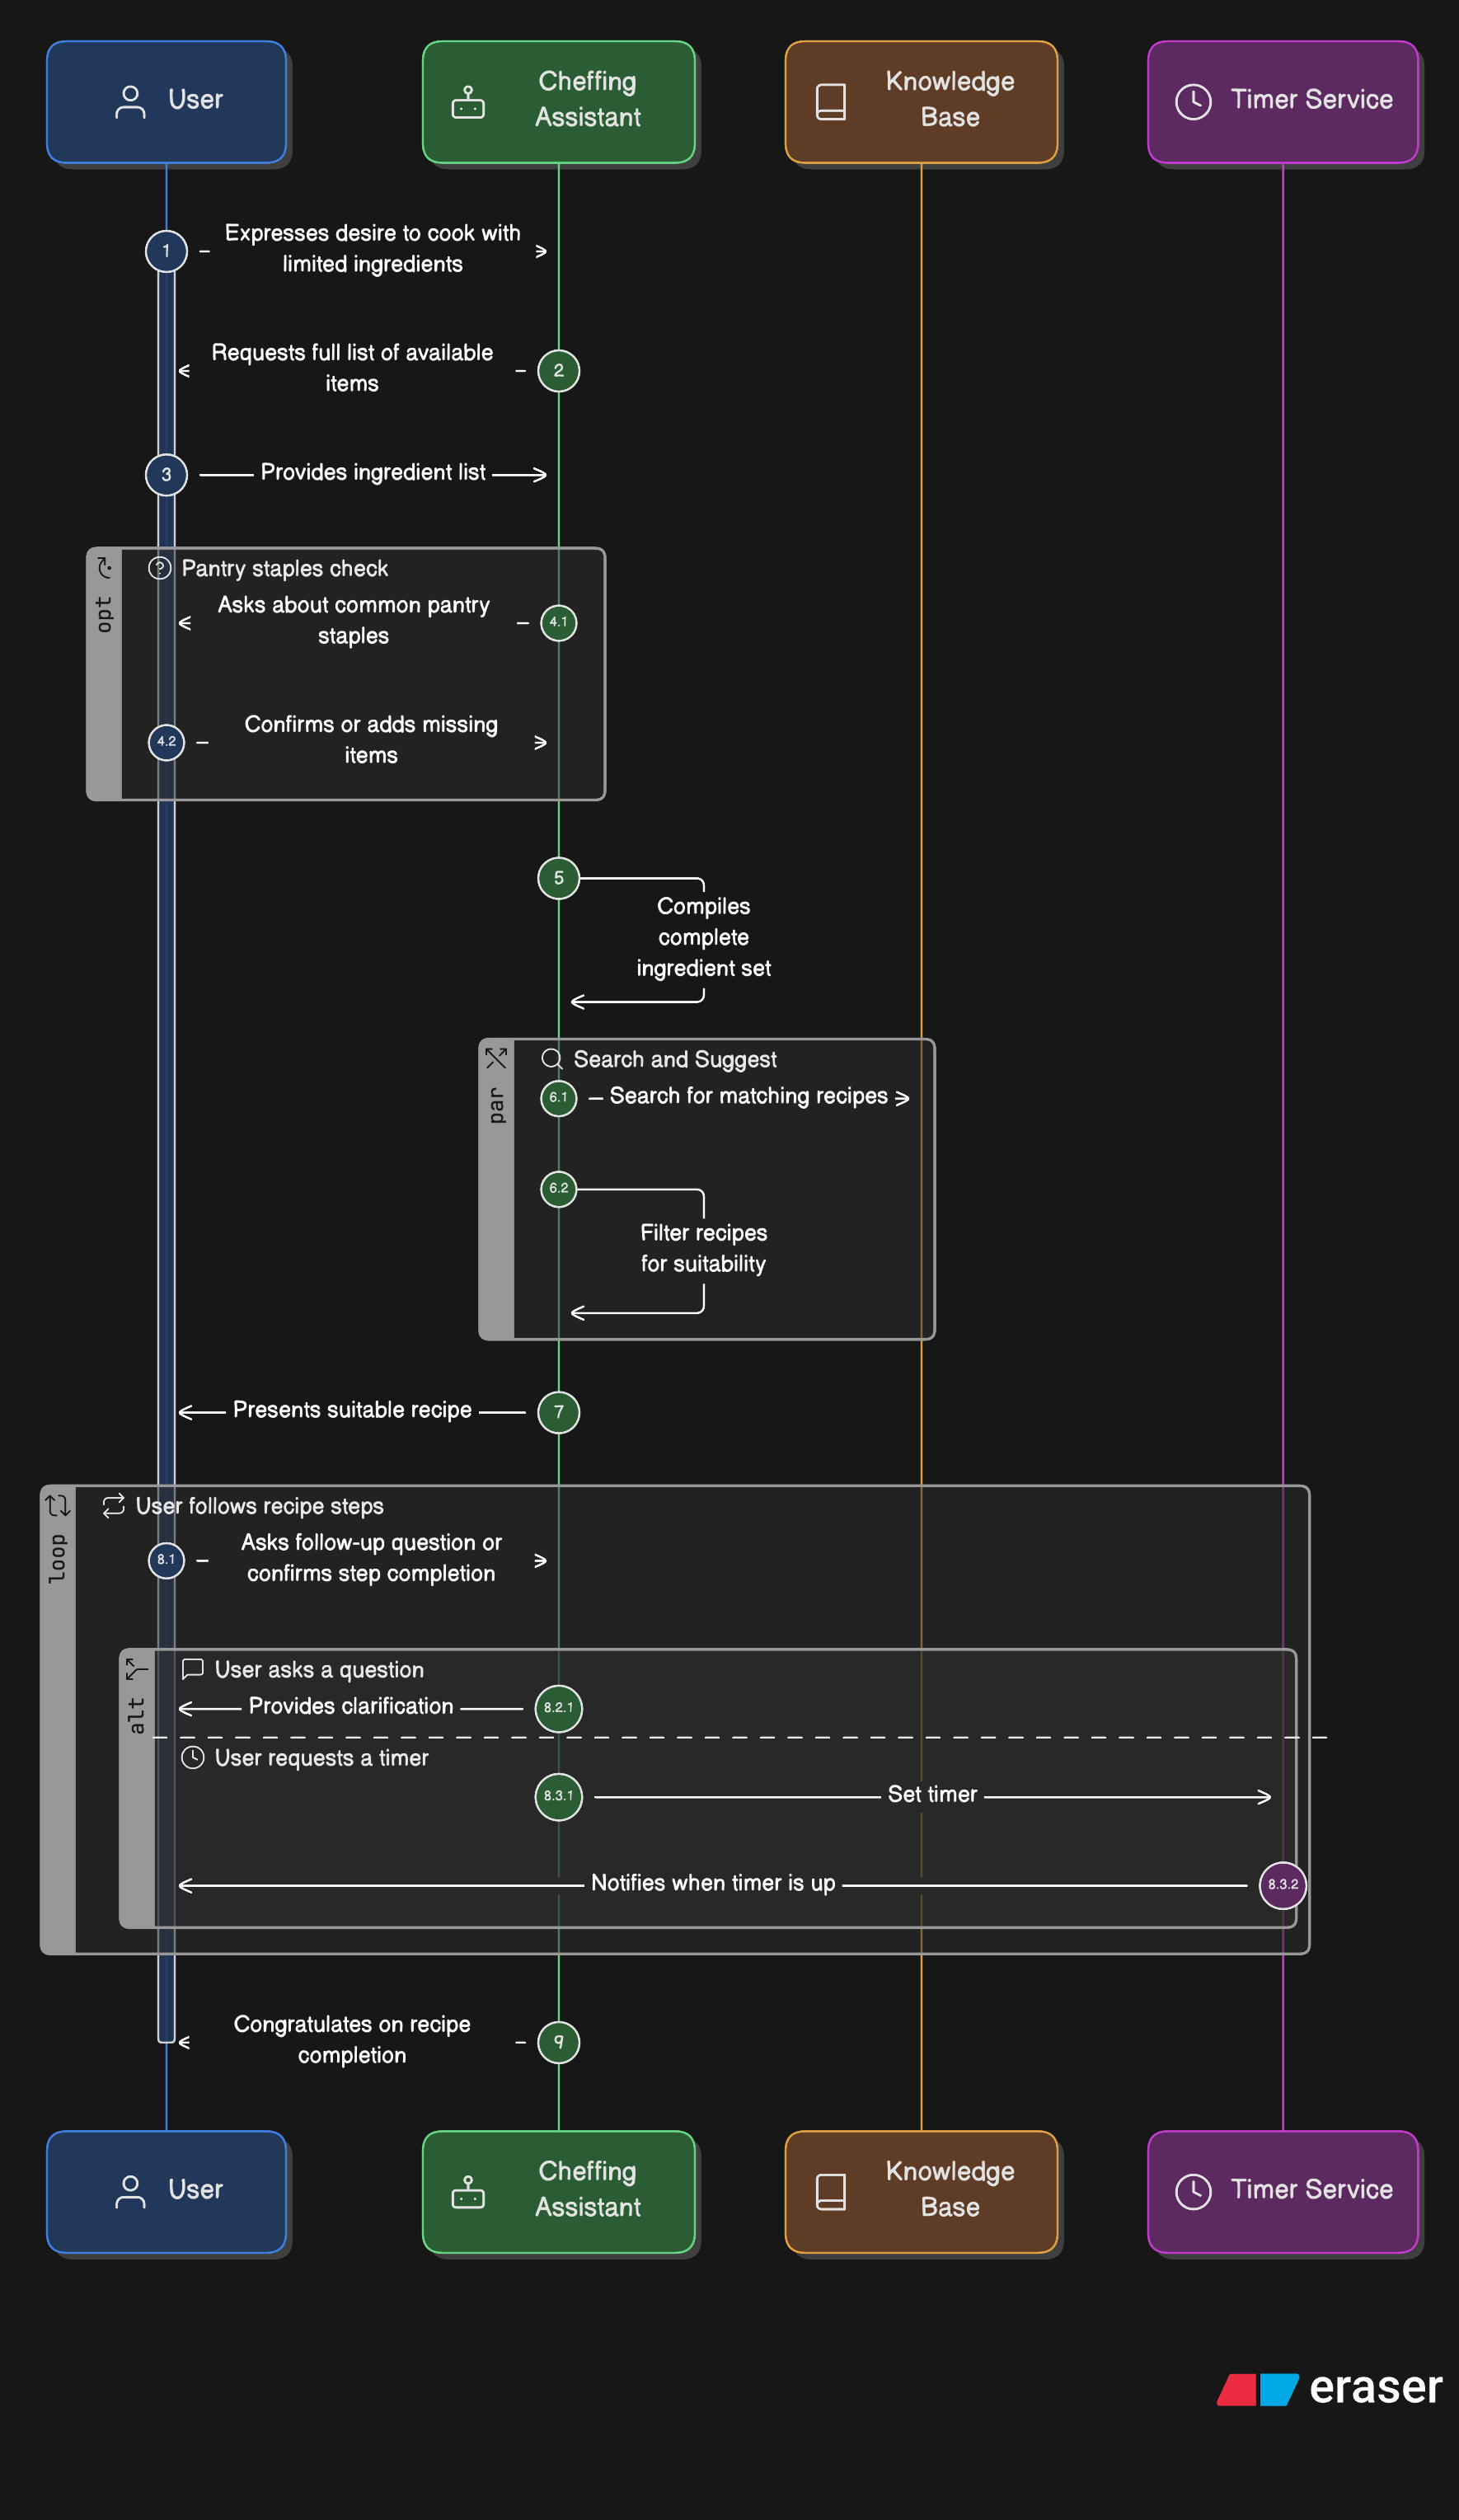

**Data**

1. User-Provided Ingredient List: A natural language text input from the user (e.g., "I have 3 eggs, half a loaf of bread, and some milk").
2. User Confirmation of Staples: A follow-up "yes/no" or text list confirming pantry staples (oil, salt, spices, etc.).
3. Implicit LLM Knowledge: The LLM's internal, pre-trained knowledge base of countless recipes, cooking techniques, and ingredient pairings.
4. Parsed Ingredient List: A structured list (like an array) that the LLM creates internally to represent the user's available items. 

Recipe Output: 
<br>(Recipe Title)
<br>(Formatted Ingredient List)
<br>(Numbered, step-by-step instructions)

**Evaluation**

Simple Test: Give the LLM a classic, simple list (e.g., "eggs, milk, bread, butter"). It should successfully return a recipe for French Toast.

Constraint Test: Give the LLM a list (e.g., "chicken, lettuce, tomatoes, onion") and explicitly state "I do not have oil or any dressing." A successful test means the LLM does not suggest a "simple vinaigrette" (which requires oil) but instead suggests something like a "dry-rubbed chicken salad."

Subset Test: Give the LLM a longer list (e.g., "flour, sugar, eggs, butter, chocolate chips, onions, garlic"). It should be able to identify the "sweet" subset and suggest Chocolate Chip Cookies, correctly ignoring the onions and garlic.

**Possible complications and errors**

Ingredient Hallucination: The most critical failure. The LLM suggests a recipe and adds an ingredient that the user did not list (e.g., "add a splash of lemon juice" when the user never mentioned lemons).

Vague User Input: The user says "some vegetables" or "cheese." The LLM must be programmed to ask for clarification ("What kind of vegetables?" or "What type of cheese?") as this drastically changes the possible recipes.

Incoherent Ingredients: The user provides a list with no logical recipe (e.g., "gummy bears, a can of tuna, and mustard"). The LLM should gracefully state that it cannot find a manageable recipe for that combination, rather than inventing something inedible.

## Scenario 4 (Parsa)
Adapting recipes intelligently to your available kitchen tools and time
### Narrative
The user opens Chefing to cook a recipe — for example, crispy tofu stir-fry. Chefing detects or asks which appliances and tools are available (e.g., “I only have an air fryer and a rice cooker today”). Instead of requiring a stovetop or oven, Chefing dynamically adjusts cooking steps, timing, and temperature to fit what’s available.

The LLM explains the adjusted method conversationally (“Let’s crisp the tofu in your air fryer at 190°C for 10 minutes while we steam rice in the cooker”). If the user has limitations (e.g., missing an ingredient), Chefing also proposes practical swaps that fit the equipment.

Throughout cooking, Chefing provides real-time guidance — it can pace the steps, set timers, and adjust further if something changes (“The air fryer batch looks soggy? Let’s add 3 more minutes”). The system learns preferences over time (e.g., you prefer extra crispy textures) to fine-tune future adjustments.
### Step-by-Step Breakdown
![image.png](attachment:16fc95db-fa42-4a6b-bed5-5f558802b7e7.png)

### Data Description

#### Needed Data
- Recipe metadata: ingredients, default steps, timing, required tools.
- User device data: available appliances (manual input or connected smart devices).
- User preferences (e.g., dietary, texture, time constraints).
#### Created Data
- Adapted recipe structure (step list with revised tools, timing).
- Interaction log (what tools were available, what substitutions were made).
- Feedback/performance data to refine future recommendations.

### Evaluation
#### Success criteria
- Output recipe is feasible with given tools.
- User completes cooking successfully and rates satisfaction ≥ defined threshold (e.g., 4/5).
- Recipe adaptation preserves intended flavor/texture profile.
#### Potential complications
- User lists incompatible tools (e.g., “only have a blender”).
- Missing metadata for certain recipes (no air fryer equivalent).
- Temperature conversions or cook time errors.
- LLM overcomplicates steps or misunderstands equipment function.

## Scenario 6 (Parsa)
Minimizing food waste by proactively suggesting creative, personalized ways to use ingredients before they expire.

### Narrative
Chefing connects to a user’s smart fridge, grocery app, or lets them manually track pantry items. It monitors expiration dates and usage frequency.

When something is close to expiring — say, spinach and half a carton of cream — Chefing sends a push notification: “Your spinach and cream will expire in 2 days — want some quick recipe ideas?”

The user opens the app and gets a list of 2–3 recipe suggestions tailored to their available tools, time, and taste preferences (“Creamy spinach pasta in 15 minutes” or “Spinach pancakes in the air fryer”). Chefing can automatically adjust portions to match what’s left and suggest add-ons if something essential is missing (“You’re low on garlic — shall I add it to your next shopping list?”).

### Step-by-Step Breakdown
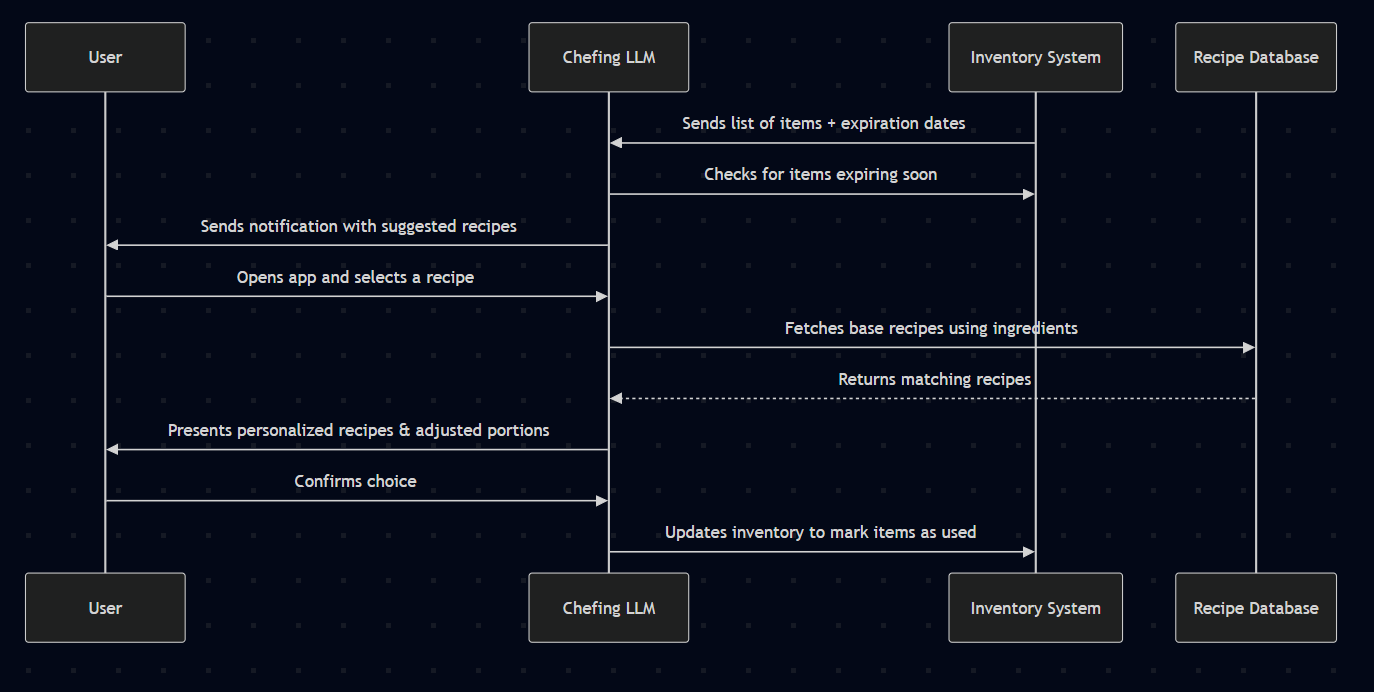

### Data Description
#### Needed Data
- Ingredient inventory (item names, quantities, expiration dates).
- User preferences (diet, flavor profile, equipment).
- Recipe database indexed by ingredient compatibility.
#### Created Data
- List of “expiring soon” items.
- Generated recipe suggestions with match scores.
- Updated pantry state (after recipe selection).
- Interaction log for personalization (which recipes user prefers when reducing waste).

### Evaluation
#### Success criteria
- Expiring ingredients are successfully incorporated into suggested recipes.
- User accepts and cooks ≥ X% of suggested dishes.
- Food waste reduction over time (measured via inventory delta).
#### Potential complications
- Incorrect or missing inventory data (manual entry errors).
- User ignores notifications.
- Ingredient substitution logic fails (suggests recipes needing too many extras).
- Over-personalization leading to repetition or “recipe fatigue.”